# NLP WordCloud

**WordCloud** is a technique to show which words are the most frequent among the given text.

## Example 1: 

Create a WordCloud and customize it as you see fit. This tool will be quite handy for exploring text data and making your report more lively.

In [9]:
#!pip install wordcloud

    100% |████████████████████████████████| 163kB 288kB/s 


In [11]:
# the latest version with the ability to mask the cloud into any shape of your choice 
# requires a different method of installation as below

!git clone https://github.com/amueller/word_cloud.git
#!cd word_cloud
#!pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 3684 (delta 4), reused 8 (delta 4), pack-reused 3673
Receiving objects: 100% (3684/3684), 67.65 MiB | 3.33 MiB/s, done.
Resolving deltas: 100% (2047/2047), done.
Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [14]:
!pwd
import os
os.chdir('word_cloud')
!pwd
!pip install .

/Users/ksatola/Documents/git/Data-Science-Templates
/Users/ksatola/Documents/git/Data-Science-Templates/word_cloud
Processing /Users/ksatola/Documents/git/Data-Science-Templates/word_cloud
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /private/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T/pip-ephem-wheel-cache-90fzr7ge/wheels/8e/f3/3b/bc8d4a0f370ad1547b19db3b18c02e6b2a360059be6f1fa877
Successfully built wordcloud
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [15]:
os.chdir('..')
!pwd

/Users/ksatola/Documents/git/Data-Science-Templates


In [ ]:
# Dataset - Wine Reviews
# Details: https://www.kaggle.com/zynicide/wine-reviews/downloads/wine-reviews.zip/4

In [17]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Load in the dataframe
df = pd.read_csv("data/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [24]:
lenv = len(df.variety.unique())

In [31]:
print(f"There are:")
print(f"- {df.shape[0]} observations and {df.shape[1]} features in this dataset.")
print(f"- {len(df.variety.unique())} types of wine in this dataset such as {', '.join(df.variety.unique()[0:5])}...")
print(f"- {len(df.country.unique())} countries producing wine in this dataset such as {', '.join(df.country.unique()[0:5])}...")
      

There are:
- 129971 observations and 13 features in this dataset.
- 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir...
- 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France...


In [32]:
df[["country", "description", "points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [35]:
# Groupby by country
country = df.groupby("country")
# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [36]:
# Select the top 5 highest average points among all 44 countries
country.mean().sort_values(by="points", ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


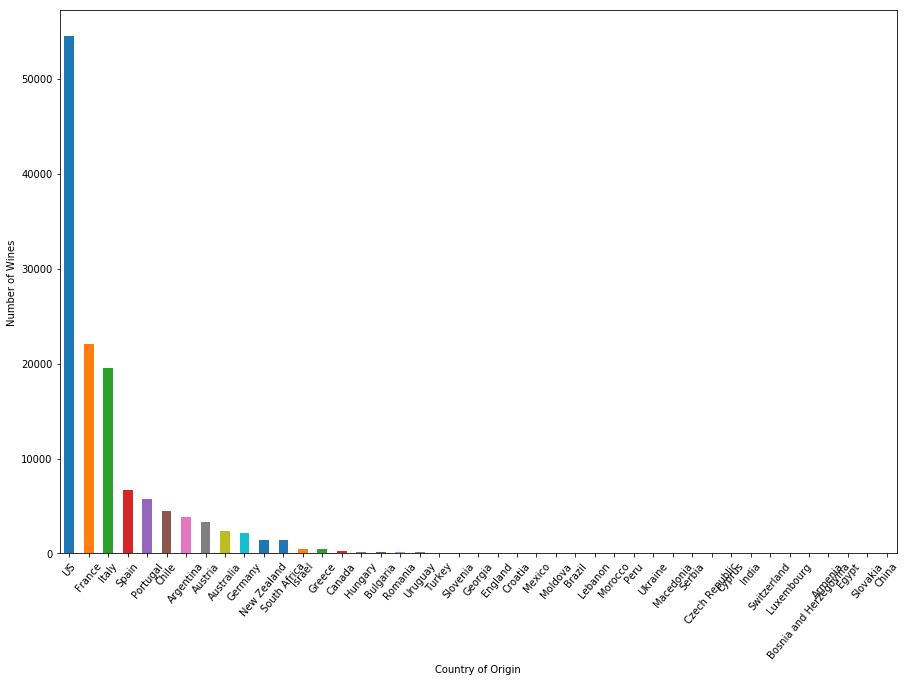

In [37]:
# Plot the number of wines by country 
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show();

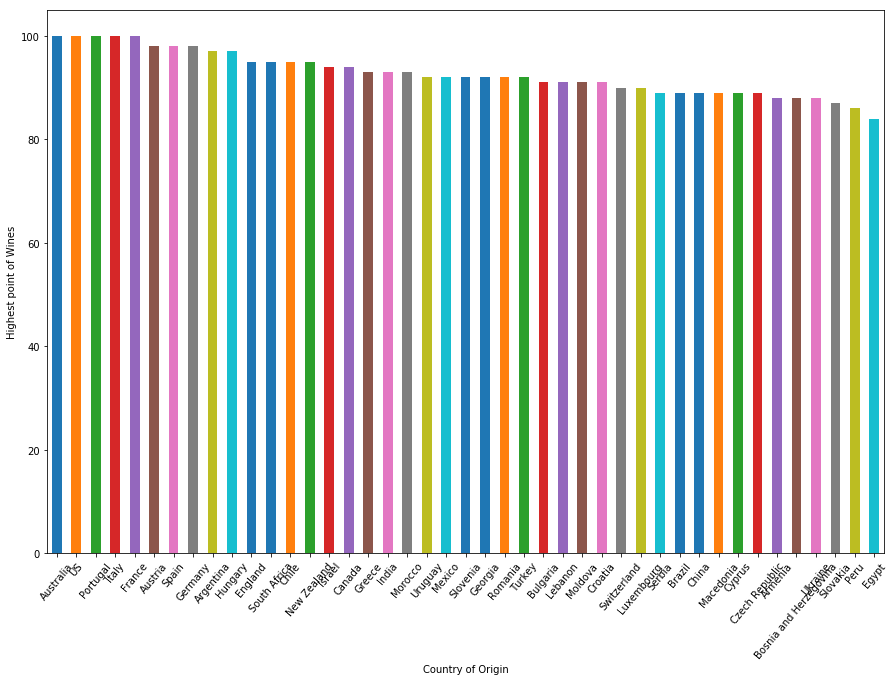

In [38]:
# Plot of all 44 countries by its highest rated wine
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show();

## Resources

- [Generating WordClouds in Python](https://www.datacamp.com/community/tutorials/wordcloud-python)